In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from util import *
import warnings
warnings.filterwarnings('ignore')

In [20]:
train_transaction = pd.read_csv('dataset/original/train_transaction.csv')
train_identity = pd.read_csv('dataset/original/train_identity.csv')
test_identity = pd.read_csv("dataset/original/test_identity.csv")
test_transaction = pd.read_csv("dataset/original/test_transaction.csv")


In [67]:
train_transaction.head()
#train_transaction.shape
to_drop=['V317']
train_transaction = train_transaction.drop(to_drop,axis='columns')
train_transaction.head()
#train_transaction.show()
##



Adding the 2 features which are day and hour 

In [42]:
df = pd.DataFrame(train_transaction.csv)
hour = [1, 2, 3, 4]
day = ['sunday','monday','tuesday']
df['Day'] = day
df['Hours'] = hour 
train_transaction.head()


...

How many transactions have identities?

In [ ]:
train_transaction_id_ratio = round(np.sum(train_transaction['TransactionID'].
                                        isin(train_identity['TransactionID'])) / test_transaction.shape[0] * 100, 2)

test_transaction_id_ratio = round(np.sum(test_transaction['TransactionID'].
                                        isin(test_identity['TransactionID'])) / test_transaction.shape[0] * 100, 2)

print(f"{train_transaction_id_ratio} of transactionID in train_transaction is in train_identity dataset")
print(f"{test_transaction_id_ratio} of transactionID in test_transaction is in test_identity dataset")

28.47 of transactionID in train_transaction is in train_identity dataset
28.01 of transactionID in test_transaction is in test_identity dataset


...

How many unique and missing values do we have for each feature?

Dataset Shape: (590540, 394)
              Name   dtypes  Missing  Uniques  Entropy
0    TransactionID    int64        0   590540    19.17
1          isFraud    int64        0        2     0.22
2    TransactionDT    int64        0   573349    19.11
3   TransactionAmt  float64        0    20902     8.35
4        ProductCD   object        0        5     1.28
5            card1    int64        0    13553     9.97
6            card2  float64     8933      500     6.32
7            card3  float64     1565      114     0.68
8            card4   object     1577        4     1.09
9            card5  float64     4259      119     2.66
10           card6   object     1571        4     0.82
11           addr1  float64    65706      332     5.06
12           addr2  float64    65706       74     0.08
13           dist1  float64   352271     2651     6.34
14           dist2  float64   552913     1751     7.42
15   P_emaildomain   object    94456       59     2.68
16   R_emaildomain   object   453249

Text(0, 0.5, 'Missing (%)')

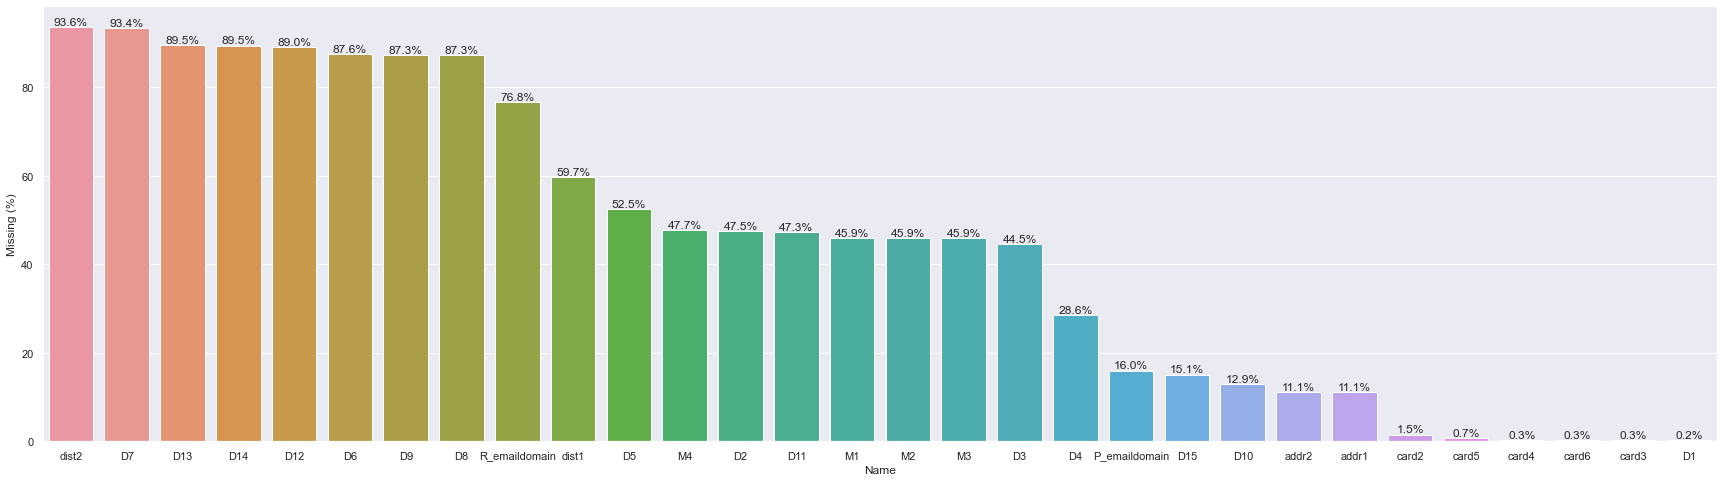

In [ ]:
analytics = resumetable(train_transaction)[:50]
print(analytics)
#Remove 0% missing from barplot
analytics['Missing'] =  analytics['Missing'].replace({0:np.nan})
for i in range(len(analytics['Name'])):
    if (np.isnan(analytics['Missing'][i])):
        analytics['Name'][i] = np.nan

analytics.sort_values(by="Missing", axis=0, ascending=False, inplace=True)


sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.barplot(x = analytics['Name'],
                 y = analytics['Missing']/train_transaction.shape[0]*100,
                 data = analytics
            )
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
    
ax.set_label("Missing Values in features %")
ax.set_ylabel('Missing (%)')

Is the dataset biased?

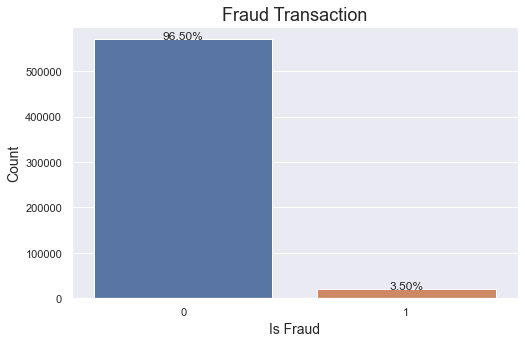

In [ ]:
fig, ax  = plt.subplots(figsize=(8, 5))
sns.countplot(x='isFraud', data=train_transaction, ax=ax)
ax.set_title('Fraud Transaction', fontsize=18)
ax.set_xlabel('Is Fraud', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            f'{height/train_transaction.shape[0] * 100:.2f}%',
            ha='center', fontsize=12)

Which product category is most frequent, and which is related the most to frauds?

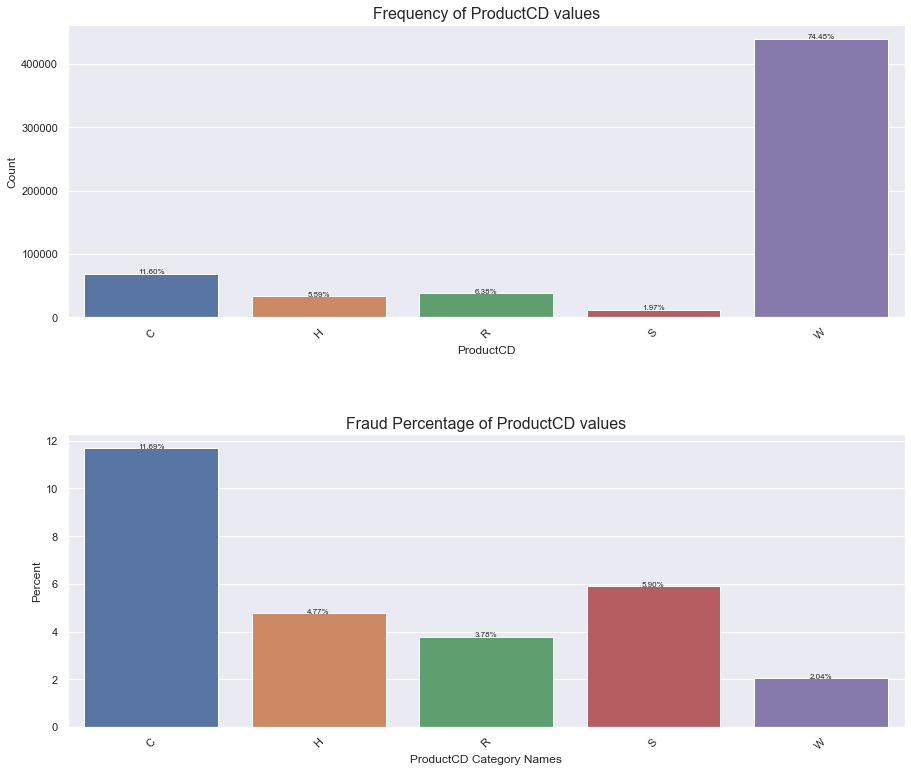

In [ ]:
count_fraud_plot(train_transaction, 'ProductCD')

Distribution plot of TransactionDT. Shows that training dataset and testing dataset were taken about 1 month apart.

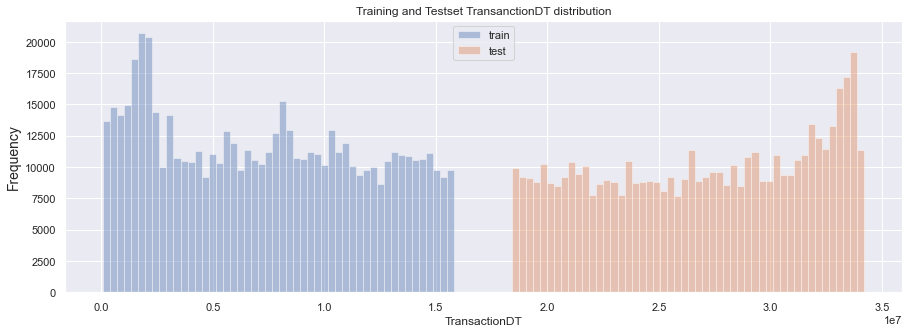

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(train_transaction['TransactionDT'], kde=False, ax=ax, label='train')
sns.distplot(test_transaction['TransactionDT'], kde=False, ax=ax, label='test')
ax.set_title('Training and Testset TransanctionDT distribution')
ax.set_ylabel('Frequency', fontsize=14)
ax.legend()

C12 Outliers visualized

Text(0, 0.5, 'C12')

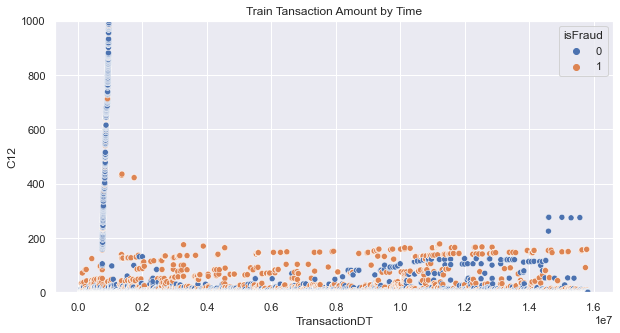

In [ ]:
cmap=sns.color_palette("RdBu", n_colors=2)
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=train_transaction['TransactionDT'],
                y=train_transaction['C12'],
                alpha=1,
                color=cmap[0],
                hue=train_transaction['isFraud'])
ax.set(ylim=(0, 1000))
ax.set_title("Train Tansaction Amount by Time")
ax.set_xlabel("TransactionDT")
ax.set_ylabel("C12")

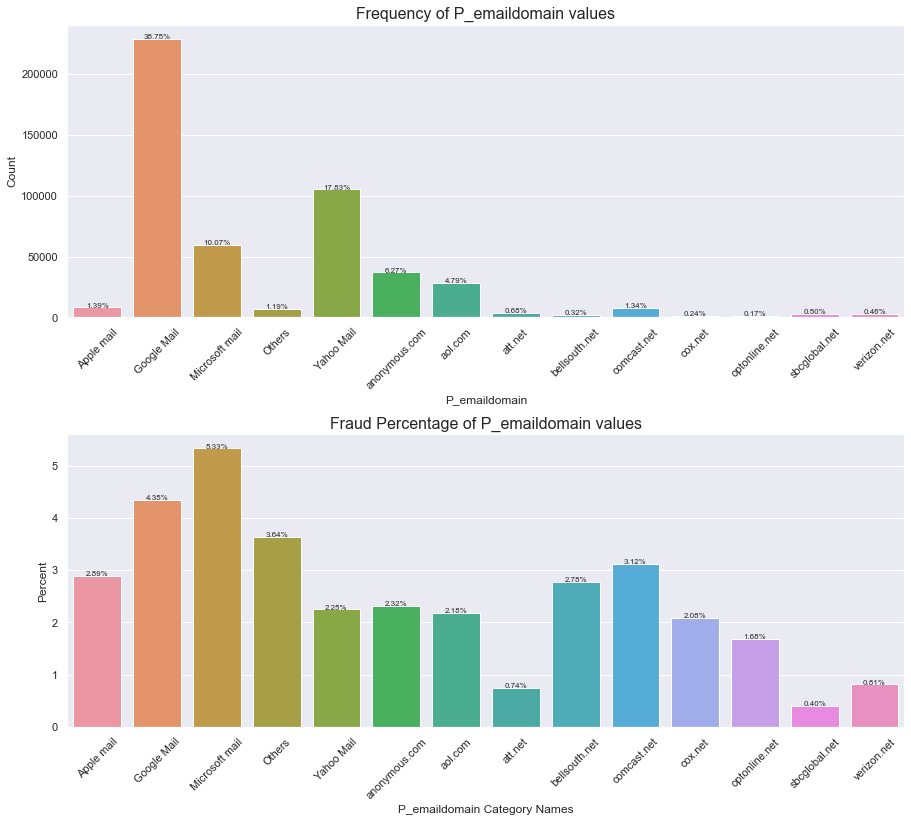

In [ ]:
train_transaction = group_email_domain(train_transaction)
count_fraud_plot(train_transaction, 'P_emaildomain')